<a href="https://colab.research.google.com/github/saiprasadlaxmeshwar/Apple_Stock_Price_Prediction/blob/master/Recurrent_neural_network_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [ ]:
#get stocks
df = web.DataReader('AAPL', data_source='yahoo',start='2012-01-01',end='2020-08-18')


In [ ]:
df.shape


(2171, 6)

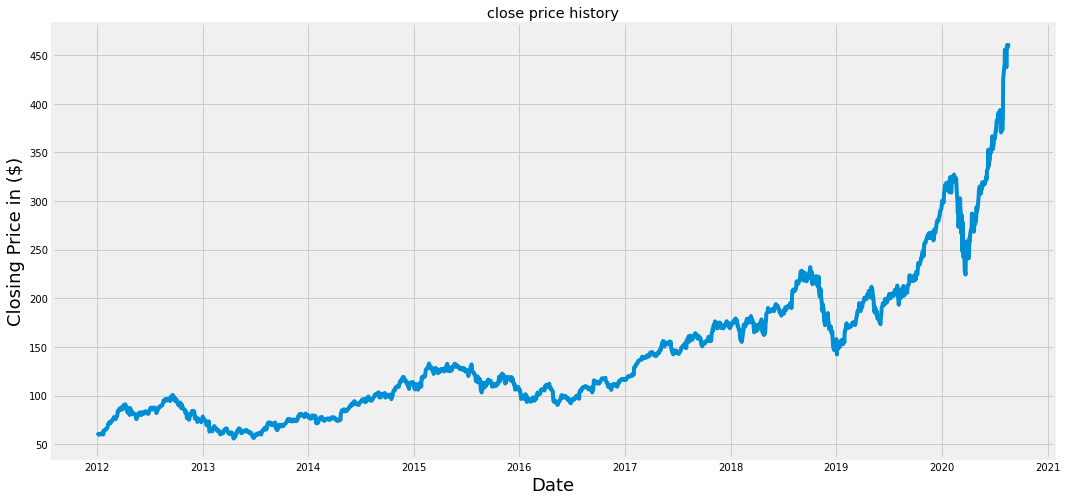

In [ ]:
#visualize the data
plt.figure(figsize=(16,8))
plt.title('close price history')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price in ($)', fontsize=18)
plt.show()


In [ ]:
#Create a new dataframe with only closing price column.
data = df.filter(['Close'])

#Convert the dataframe into numpy array
dataset = data.values

In [ ]:
#Get the rows to train the lstm model.
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

1737

In [ ]:
#scale  the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data= scaler.fit_transform(dataset)
scaled_data


array([[0.00727536],
       [0.0080521 ],
       [0.00966533],
       ...,
       [0.99355411],
       [0.99060176],
       [1.        ]])

In [ ]:
#create the training dataset
#create scaled training dataset
train_data = scaled_data[0:training_data_len , :]
#split the data into x_train and y_train
x_train = []
y_train= []

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i <= 60 :
    print(x_train)
    print(y_train)
    print()


[array([0.00727536, 0.0080521 , 0.00966533, 0.01120124, 0.01096576,
       0.01149647, 0.01125396, 0.01084626, 0.01029095, 0.01200961,
       0.01355958, 0.01308159, 0.01046316, 0.01296209, 0.01050182,
       0.01972782, 0.01901434, 0.01994573, 0.02195963, 0.02317922,
       0.02307729, 0.02270123, 0.02430392, 0.0258117 , 0.02751984,
       0.03027886, 0.03607454, 0.0361624 , 0.03938888, 0.04179993,
       0.03765613, 0.0392518 , 0.03922017, 0.04369434, 0.04305818,
       0.04423558, 0.04635142, 0.04752884, 0.05092049, 0.05339131,
       0.05410477, 0.05435432, 0.0501297 , 0.04911043, 0.04926157,
       0.05323313, 0.05435081, 0.05675131, 0.06240993, 0.06995944,
       0.06854654, 0.06855005, 0.07400834, 0.07571646, 0.07450038,
       0.07338976, 0.07223343, 0.07607495, 0.07871097, 0.07981457])]
[0.07708718027649658]



In [ ]:
#convert X and Y Train into numpy arrays.
x_train,y_train = np.array(x_train),np.array(y_train)


In [ ]:
#Reshape the data as the lstm model expects data to be 3 dimensional.
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape


(1677, 60, 1)

In [ ]:
#Lets Build the lstm model
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape= (x_train.shape[1],1)))
model.add(LSTM(50,return_sequences= False))
model.add(Dense(25))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
model.fit(x_train,y_train, batch_size=1,epochs=1)

1677/1677 [==============================] - 39s 23ms/step - loss: 3.8427e-04


In [ ]:
#create Testing dataset
#create a new array containing scaled values from index 1677 till 2171
test_data= scaled_data[training_data_len-60: , :] 
#Lets create x_test and y_test dataset
x_test=[]
y_test= dataset[training_data_len:,:]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])




In [ ]:
#CConvert a numpy array of x_test
x_test= np.array(x_test)
x_test.shape

(434, 60)

In [ ]:
#lets reshape the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(434, 60, 1)

In [ ]:
#Get models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
#now lets evaluate the model with RMSE metric
rmse= np.sqrt(np.mean(predictions-y_test)**2)
rmse


1.8142245947490638

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


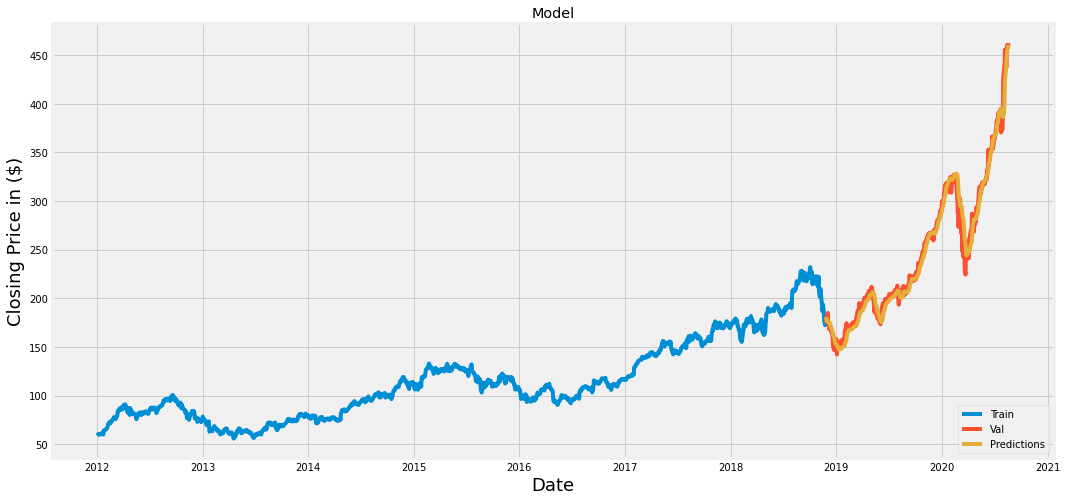

In [ ]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the Plot
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price in ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'], loc= 'lower right')
plt.show()


In [ ]:
valid

,Close,Predictions
Date,,
2018-11-27,174.240005,180.715286
2018-11-28,180.940002,178.207581
2018-11-29,179.550003,176.831314
2018-11-30,178.580002,176.088470
2018-12-03,184.820007,175.687271
...,...,...
2020-08-12,452.040009,446.578430
2020-08-13,460.040009,450.334869
2020-08-14,459.630005,454.221405


In [ ]:
#Get the Quote
apple_quote= web.DataReader('AAPL', data_source='yahoo',start='2012-01-01',end='2020-08-18')
#create new data frame
new_df= apple_quote.filter(['Close'])
#Get last 60 days closing price
last_60_days= new_df[-60:].values
#scale the data
last_60_days_scaled = scaler.transform(last_60_days)
#create an empty list
X_test = []
#append the last 60 days prices to X_test
X_test.append(last_60_days_scaled)
#lets convert X_test to a Numpy array
X_test = np.array(X_test)
#Reshape the data to 3 dimentional
X_test= np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#Get the predicted scaled price
pred_price= model.predict(X_test)
#inverse Transform the Scaled data 
pred_price= scaler.inverse_transform(pred_price)


In [ ]:
#Apple Closing Stock Price Predictions for 08/19/2020
print(pred_price)



[[462.83902]]
